In [73]:
!pip3 install pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nunzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [74]:
import os
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# this script generates the plots for the experiments in guildford 

#for each experiment folder in path ../guildford_data/TEST-*/*/
# merge all the latency_*.csv files into one file and save it in the same folder calling it merged_latency_TEST-*.csv and change the header
#the header should be Timestamp,latency_ms with capital T

# read all the csv files in the folder
csv_files = glob.glob('../guildford_data/TEST-*/**/latency_*.csv', recursive=True)
# for each csv file, get the folder name and the experiment name
for csv_file in csv_files:
    # get the folder name
    folder_name = os.path.dirname(csv_file)
    # get the experiment name
    experiment_name = os.path.basename(folder_name)
    # get the list of all csv files in the folder
    csv_files_in_folder = glob.glob(os.path.join(folder_name, 'latency_*.csv'))
    
    # read all the csv files into a list of dataframes
    dfs = [pd.read_csv(f) for f in csv_files_in_folder]
    
    # concatenate all the dataframes into one dataframe
    merged_df = pd.concat(dfs, ignore_index=True)

    # rename the columns
    merged_df.columns = ['Timestamp', 'latency_ms']
    
    # save the merged dataframe to a new csv file
    merged_df.to_csv(os.path.join(folder_name, f'merged_latency_{experiment_name}.csv'), index=False)


In [75]:
# get if found in the test name folder named (merged_latency*.csv, log_robot*.csv, log_go*.csv) and then create a dataframe
# allying rows using the timestamp
# path is ../guildford_data/test_name/**/<these files>

test_names = ['TEST-01', 'TEST-02', 'TEST-03', 'TEST-04', 'TEST-05', 'TEST-06', 'TEST-07', 'TEST-08', 'TEST-09', 'TEST-10', 'TEST-11', 'TEST-12']

tests_dfs = {}

for test_name in test_names:
    print(f'Processing {test_name}...')

    # get the list of all csv files in the folder
    latency_file = glob.glob(os.path.join('../guildford_data', test_name, '**', 'merged_latency*.csv'), recursive=True)
    log_robot_file = glob.glob(os.path.join('../guildford_data', test_name, '**', 'log_robot*.csv'), recursive=True)
    log_go_file = glob.glob(os.path.join('../guildford_data', test_name, '**', 'log_go*.csv'), recursive=True)

    # print how many files were found
    print(f'Found {len(latency_file)} latency files')
    print(f'Found {len(log_robot_file)} log_robot files')
    print(f'Found {len(log_go_file)} log_go files')

    list_of_files = []
    # add the files to the list if they exist
    if latency_file:
        list_of_files.append(latency_file[0])
    if log_robot_file:
        list_of_files.append(log_robot_file[0])
    if log_go_file:
        list_of_files.append(log_go_file[0])

    # read all the csv files into a list of dataframes
    dfs = [pd.read_csv(f) for f in list_of_files]

    # sort the dataframes by timestamp
    for df in dfs:
        df.sort_values(by='Timestamp', inplace=True)
        df.reset_index(drop=True, inplace=True)

    # merge with merge_asof
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge_asof(merged_df, df, on='Timestamp', direction='nearest', tolerance=20)

    tests_dfs[test_name] = merged_df

    # print columns
    print(f'Columns in {test_name}: {merged_df.columns.tolist()}')

    # save the merged dataframe to a new csv file
    merged_df.to_csv(os.path.join('../guildford_data', test_name, f'merged_{test_name}.csv'), index=False)




Processing TEST-01...
Found 1 latency files
Found 1 log_robot files
Found 1 log_go files
Columns in TEST-01: ['Timestamp', 'latency_ms', 'vLossRate', 'vDelayRate', 'vLoss', 'state', 'usage', 'GCCBandwidth(b/s)', 'ReceiveEstimateBandwidth(b/s)', 'FrameDimension(B)', 'WebSocketTime(us)', 'nopReceived', 'nopOriginal', 'lossRate']
Processing TEST-02...
Found 0 latency files
Found 1 log_robot files
Found 1 log_go files
Columns in TEST-02: ['Timestamp', 'vLossRate', 'vDelayRate', 'vLoss', 'state', 'usage', 'GCCBandwidth(b/s)', 'ReceiveEstimateBandwidth(b/s)', 'FrameDimension(B)', 'WebSocketTime(us)', 'nopReceived', 'nopOriginal', 'lossRate']
Processing TEST-03...
Found 1 latency files
Found 1 log_robot files
Found 1 log_go files
Columns in TEST-03: ['Timestamp', 'latency_ms', 'vLossRate', 'vDelayRate', 'vLoss', 'state', 'usage', 'GCCBandwidth(b/s)', 'ReceiveEstimateBandwidth(b/s)', 'FrameDimension(B)', 'WebSocketTime(us)', 'nopReceived', 'nopOriginal', 'lossRate']
Processing TEST-04...
Found

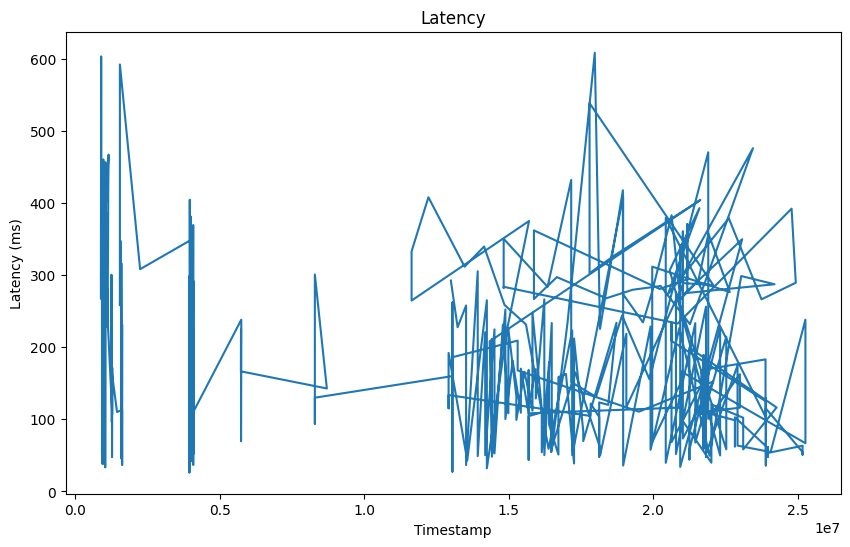